In [1]:
'''This is the first program to try to understand the data 
1) first we get the data from a view of the DB
2) narrow down for a device 
3) do a simple life expan
'''
'''first we connect'''
#more info on https://github.com/mkleehammer/pyodbc/wiki/Getting-started
import pyodbc
#pyodbc.drivers() # to find the driver 

Server='qa-datagov01.nexjqa.local'
DB='RPO_MAJIK_DISCOVERY'
Ver='sql2012'
user='nexj'
password='nexj'

cnxn = pyodbc.connect('DRIVER={SQL Server};SERVER='+Server+';DATABASE='+DB+';UID='+user+';PWD='+password)
# Create a cursor from the connection
cursor = cnxn.cursor()


In [2]:
'''selecting from a view that we created to combine error and error type'''
#sqlStr=' select  [start_time] ,[end_time]  ,[type]   FROM [RPO_MAJIK_DISCOVERY].[dbo].[Error_type_view]  WHERE [equipmentId]=\' 3980-03\' OR [type]=\' Planned\' Order by [start_time] '

sqlStr=' select  [start_time] ,[end_time]  ,[type]   FROM [RPO_MAJIK_DISCOVERY].[dbo].[Error_type_view]  WHERE [equipmentId]=\' 3980-03\' AND NOT [type]=\' Blocked\' AND NOT [type]=\' Starved\' Order by [start_time] '
#To keep in mind the white space -- get rid of it use sql functions
cursor.execute(sqlStr)
    
'''Read all at once '''
rows = cursor.fetchall()
count=0
for row in rows:
    if row[2]==' Unplanned':
        count=count+1
    elif row[2]==' Planned':
        items.append((row[0],count))  #saving the start time and how many times it broke before hand 
        count=0
    

print ("Done")

for item in items:
    print (item)


NameError: name 'items' is not defined

In [65]:
'''Writing to csv'''
import csv


f = open("Data2.csv", 'wt')
try:
    writer = csv.writer(f)
    writer.writerow( ('Date', 'value') )
    for item in items:
        writer.writerow((item[0][:16].replace('-','/'),item[1]))
finally:
    f.close()

# print open(sys.argv[1], 'rt').read()

In [28]:
'''Plotting'''
from matplotlib import pyplot as plt
import numpy as np
import matplotlib


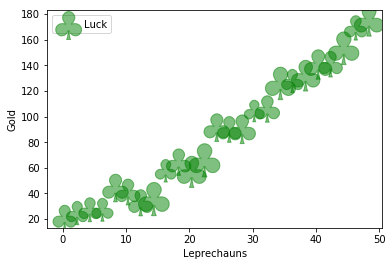

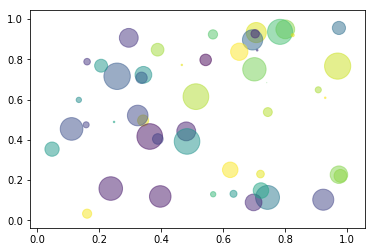

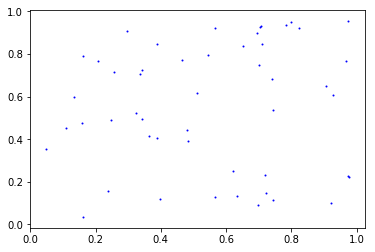

In [34]:
'''Testing'''
# Fixing random state for reproducibility
np.random.seed(19680801)


x = np.arange(0.0, 50.0, 2.0)
y = x ** 1.3 + np.random.rand(*x.shape) * 30.0
s = np.random.rand(*x.shape) * 800 + 500

plt.scatter(x, y, s, c="g", alpha=0.5, marker=r'$\clubsuit$',
            label="Luck")
plt.xlabel("Leprechauns")
plt.ylabel("Gold")
plt.legend(loc=2)
plt.show()


# Fixing random state for reproducibility
np.random.seed(19680801)


N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)
area = np.pi * (15 * np.random.rand(N))**2  # 0 to 15 point radii

plt.scatter(x, y, s=area, c=colors, alpha=0.5)
plt.show()



# Fixing random state for reproducibility
np.random.seed(19680801)
N = 50
x = np.random.rand(N)
y = np.random.rand(N)
colors = np.random.rand(N)

plt.scatter(x, y, s=1, c="b")
plt.show()




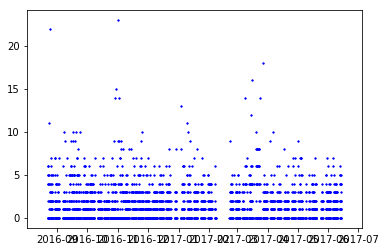

In [60]:
"""RUnning or data """
from datetime import datetime
x=[]
y=[]
# ranstr='2017-06-12 14:14:00.0000000 +00:00'
# dummy=ranstr[:16]
# print(dummy)
# datetime_object = datetime.strptime('2017-06-07 08:40', '%Y-%m-%d %H:%M')
# print (datetime_object)
for item in items:
    buff=datetime.strptime(item[0][:16], '%Y-%m-%d %H:%M')
    x.append(buff)
    y.append(item[1])


# print (x)
plt.scatter(x, y, s=1, c="b")
plt.show()